In [1]:
#  28-Apr-2021
# Explore data set distributions 
# Purpose:
# To identify the probability distribution followed by the outcome variable of a data set
# The intention is to faciliate data analysis and modeling for PyStan users.
# These programs implement eddStan (explore data set distributions)

# Now load packages and libraries

import pandas as pd
import numpy as np
import scipy
from sklearn.preprocessing import StandardScaler
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Continuous data and continuous probability distributions
# We will explore data using visualizations and see if the plots suggest some probability distributions
# Load data.

GaltonFamilies = pd.read_csv('GaltonFamilies.csv')
# Select the outcome variable from the GaltonFamilies
# galtonFamilies2 = galtonFamilies[['father', 'mother','midparentHeight','childHeight']]
data = GaltonFamilies
# The assumption is that the researcher wants to predict childHeight given father, mother and midparent heights


 # =pd.read_csv('body_fat.csv')

#printing the dataframe to see if the data was read correctly
#print(data)




In [2]:
data.head()

,Case,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,1,78.5,67.0,75.43,4,1,male,73.2
1,2,1,78.5,67.0,75.43,4,2,female,69.2
2,3,1,78.5,67.0,75.43,4,3,female,69.0
3,4,1,78.5,67.0,75.43,4,4,female,69.0
4,5,2,75.5,66.5,73.66,4,1,male,73.5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Case             934 non-null    int64  
 1   family           934 non-null    object 
 2   father           934 non-null    float64
 3   mother           934 non-null    float64
 4   midparentHeight  934 non-null    float64
 5   children         934 non-null    int64  
 6   childNum         934 non-null    int64  
 7   gender           934 non-null    object 
 8   childHeight      934 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 65.8+ KB


### DISTRIBUTION PLOTS

In [4]:
'''#1.Summary statistics with histogram'''
def summary_stats_and_hist(variable):
    global ax
    stats = variable.describe()
    ax = variable.plot.hist()
    plt.xlabel('%s' %variable.name)
    plt.title('Distribution of %s using Histogram' %variable.name)
    #abs_bar_labels()
    print('Summary Statistics of', variable.name, ':')
    return display(stats)

'''#2.Density plot with skewness.'''
def density_plot_and_skewness(variable):
    variable.plot.hist(density = True, figsize =(12,8), bins=10)
    variable.plot.kde(style = 'k--')
    plt.xlabel('%s'%variable.name)
    plt.title('Distribution of %s using Density Plot & Histogram' %variable.name)
    print('Skewness of ', variable.name, ':')
    skewness = variable.skew()
    return display(skewness)

### Outcome Variable

Skewness of  childHeight :


0.08486596797810822

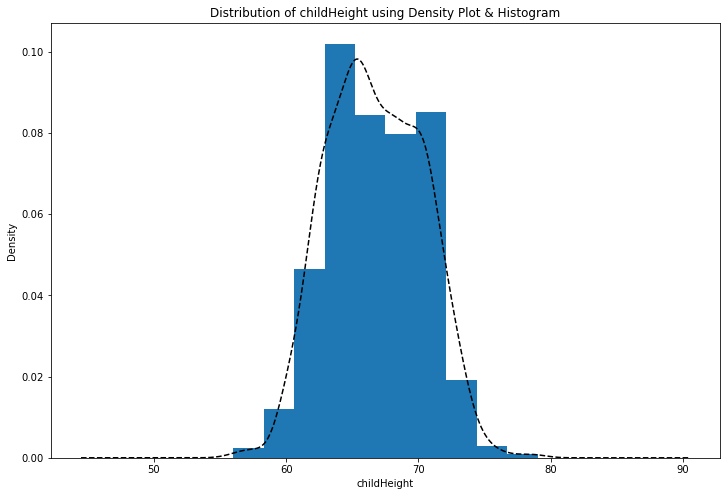

In [5]:
'''Plot density plot of ageand calculate skewness.'''
data.childHeight.agg(density_plot_and_skewness)

In [6]:
'''Create a function to count total outliers. And plot variables with and without outliers.'''
def outliers(variable):
    # Calculate 1st, 3rd quartiles and iqr.
    q1, q3 = variable.quantile(0.25), variable.quantile(0.75)
    iqr = q3 - q1
    
    
    l_fence, u_fence = q1 - 1.5*iqr , q3 + 1.5*iqr   # Any values less than l_fence and greater than u_fence are outliers.
    
    # Observations that are outliers
    outliers = variable[(variable<l_fence) | (variable>u_fence)]
    print('Total Outliers of', variable.name,':', outliers.count())
    
    # Drop obsevations that are outliers
    filtered = variable.drop(outliers.index, axis = 0)

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2,1)
    
    # Gives space between two subplots
    fig.subplots_adjust(hspace = 1) 
    
    # Plot variable with outliers
    variable.plot.box(vert = False, color = 'coral', grid = False, ax = ax1, title = 'Distribution with Outliers for %s' %variable.name, figsize =(15,8))

    # Plot variable without outliers
    filtered.plot.box(vert = False, color = 'coral', grid = False, ax = ax2, title = 'Distribution without Outliers for %s' %variable.name)

#### Detection of outliers

Total Outliers of childHeight : 1


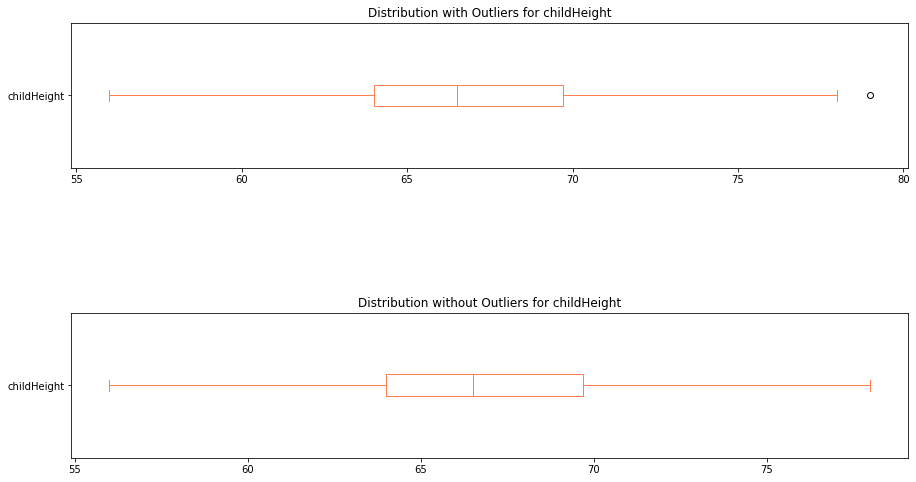

In [7]:
'''Count total outliers of Age. Plot Age with and without outliers.'''
data.childHeight.agg(outliers)

####  Independent Variables

Skewness of  father :


0.13342159262993264

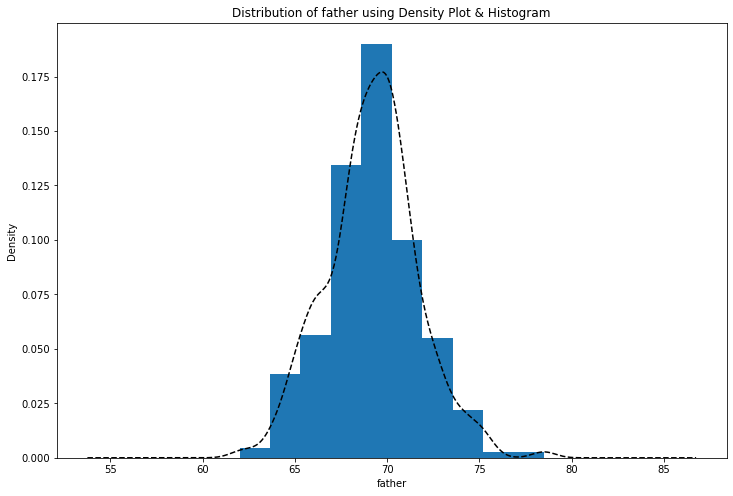

In [8]:
'''Plot density plot of ageand calculate skewness.'''
data.father.agg(density_plot_and_skewness)

Total Outliers of father : 11


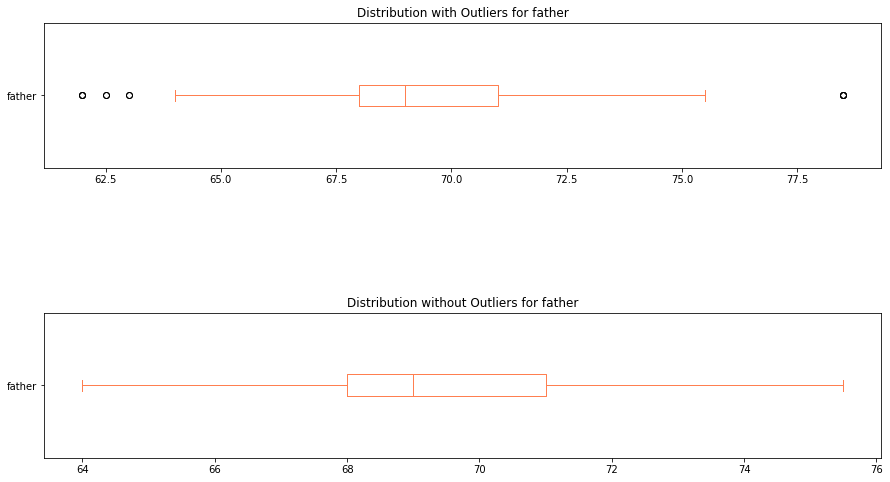

In [9]:
'''Count total outliers of Age. Plot Age with and without outliers.'''
data.father.agg(outliers)

#### Independent Variables

Skewness of  mother :


-0.30378694747700485

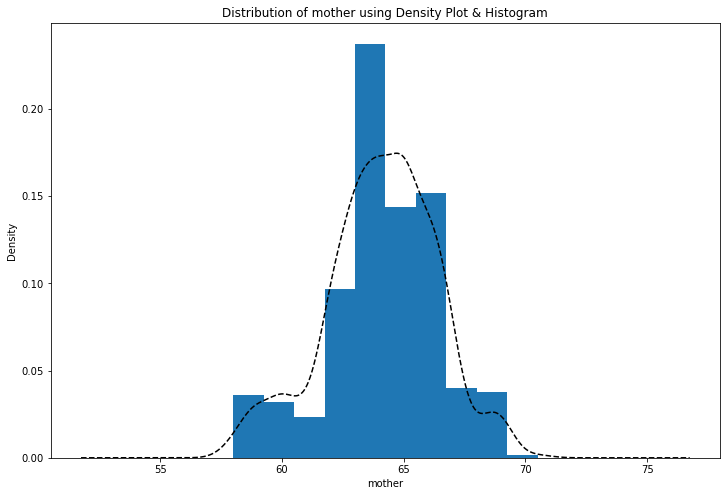

In [10]:
'''Plot density plot of ageand calculate skewness.'''
data.mother.agg(density_plot_and_skewness)

Total Outliers of mother : 18


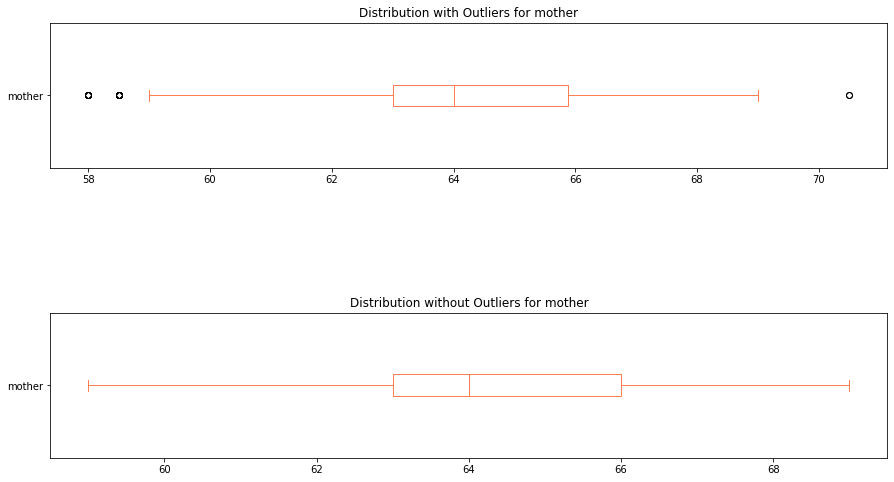

In [11]:
'''Count total outliers of Age. Plot Age with and without outliers.'''
data.mother.agg(outliers)

#### Independent Variables

Skewness of  midparentHeight :


0.114786913982291

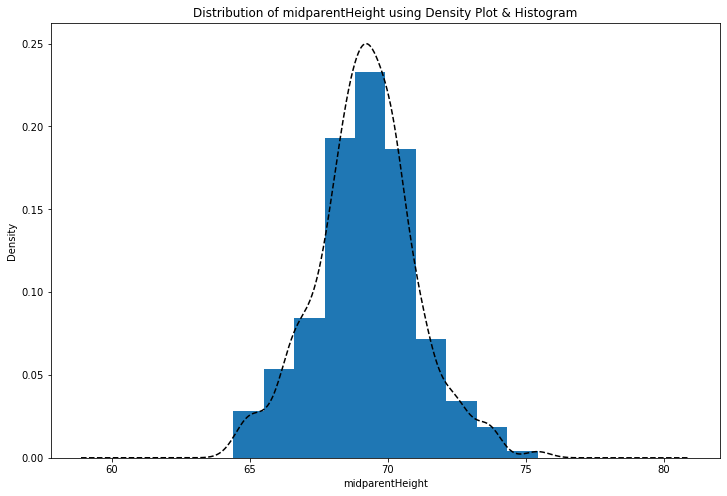

In [12]:
'''Plot density plot of ageand calculate skewness.'''
data.midparentHeight.agg(density_plot_and_skewness)

Total Outliers of midparentHeight : 40


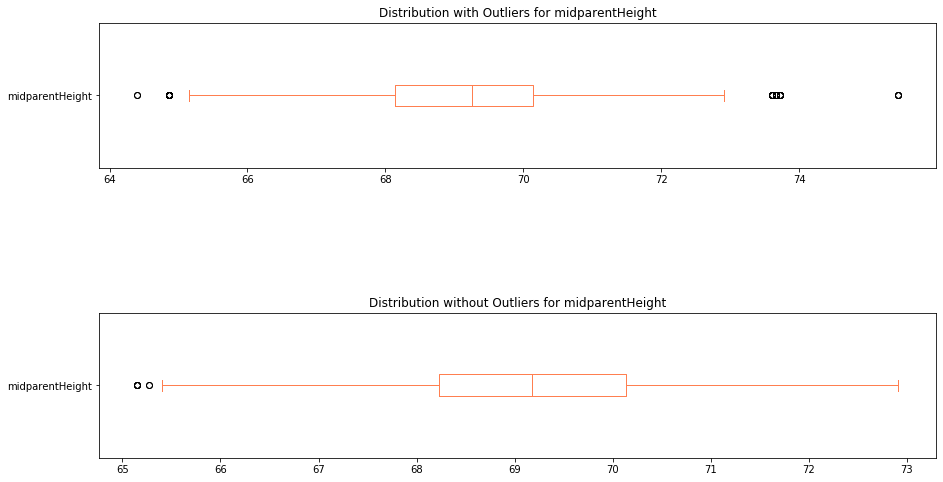

In [13]:
'''Count total outliers of Age. Plot Age with and without outliers.'''
data.midparentHeight.agg(outliers)

### DESCRIPTIVE STATISTICS

In [14]:
data = data[['father', 'mother','midparentHeight','childHeight']]
data1 = data

In [15]:
data.describe()

,father,mother,midparentHeight,childHeight
count,934.000000,934.000000,934.000000,934.000000
mean,69.197109,64.089293,69.206773,66.745931
std,2.476479,2.290886,1.802370,3.579251
min,62.000000,58.000000,64.400000,56.000000
25%,68.000000,63.000000,68.140000,64.000000
50%,69.000000,64.000000,69.248000,66.500000
75%,71.000000,65.875000,70.140000,69.700000
max,78.500000,70.500000,75.430000,79.000000


### SCATTER PLOTS

#### Outcome  Vs  Independent Variables

Text(0.5, 1.0, 'CHILD HEIGHT VS FATHER HEIGHT')

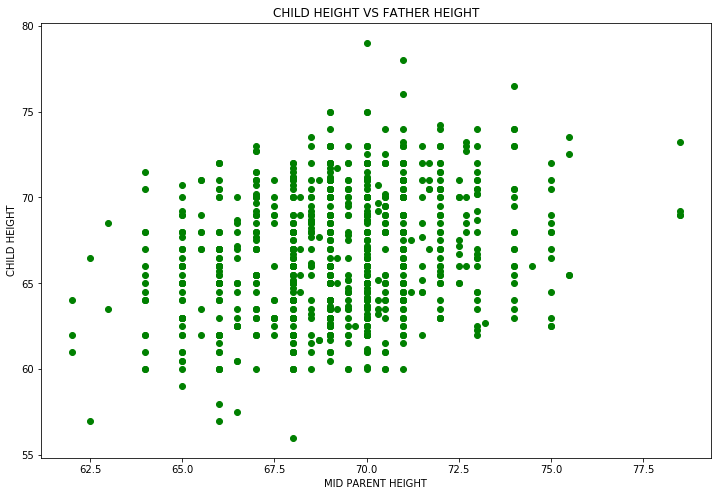

In [16]:
plt.figure(figsize=(12, 8))
plt.scatter(x = data['father'], y = data['childHeight'], color='green')
plt.ylabel('CHILD HEIGHT')
plt.xlabel('MID PARENT HEIGHT')
plt.title('CHILD HEIGHT VS FATHER HEIGHT')

#### Outcome Vs  Independent Variables

Text(0.5, 1.0, 'CHILD HEIGHT VS MOTHER HEIGHT')

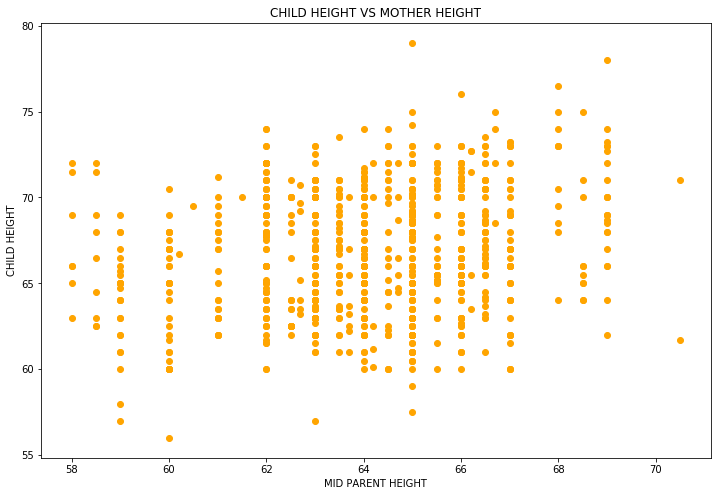

In [17]:
plt.figure(figsize=(12, 8))
plt.scatter(x = data['mother'], y = data['childHeight'], color='orange')
plt.ylabel('CHILD HEIGHT')
plt.xlabel('MID PARENT HEIGHT')
plt.title('CHILD HEIGHT VS MOTHER HEIGHT')

#### Outcome Vs Independent Variable

Text(0.5, 1.0, 'CHILD HEIGHT VS MID PARENT HEIGHT')

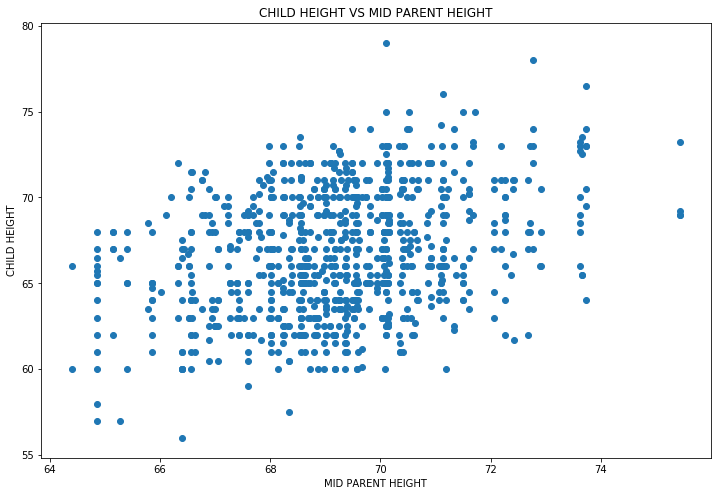

In [18]:
plt.figure(figsize=(12, 8))
plt.scatter(x = data['midparentHeight'], y = data['childHeight'])
plt.ylabel('CHILD HEIGHT')
plt.xlabel('MID PARENT HEIGHT')
plt.title('CHILD HEIGHT VS MID PARENT HEIGHT')

### TESTING FOR GOODNESS OF FIT

In [19]:
data.head()

,father,mother,midparentHeight,childHeight
0,78.5,67.0,75.43,73.2
1,78.5,67.0,75.43,69.2
2,78.5,67.0,75.43,69.0
3,78.5,67.0,75.43,69.0
4,75.5,66.5,73.66,73.5


In [20]:
x = np.arange(10)

In [21]:
x.dtype

dtype('int32')

In [22]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
y=data['childHeight'].values

# Create an index array (x) for data

x = np.arange(len(y))
size = len(y)

In [24]:
y_df = pd.DataFrame(y, columns=['Data'])
y_df.describe()

,Data
count,934.000000
mean,66.745931
std,3.579251
min,56.000000
25%,64.000000
50%,66.500000
75%,69.700000
max,79.000000


In [25]:
#######################################
# Perform goodness of fit Tests
# 
# ######################################

# Prepare data for goodness of fit test

In [26]:
# standardising data using standard scaler
sc=StandardScaler() 
yy = y.reshape (-1,1)
sc.fit(yy)
y_std =sc.transform(yy)
y_std = y_std.flatten()
y_std
del yy

In [27]:
# Set up list of candidate distributions to use


dist_names = ['beta',
              'expon',
              'gamma',
              'lognorm',
              'norm',
              'pearson3',
              'triang',
              'uniform',
              'weibull_min', 
              'weibull_max']

# Set up empty lists to stroe results
chi_square = []
p_values = []

# Set up 50 bins for chi-square test
# Observed data will be approximately evenly distrubuted aross all bins
percentile_bins = np.linspace(0,100,51)
percentile_cutoffs = np.percentile(y_std, percentile_bins)
observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
cum_observed_frequency = np.cumsum(observed_frequency)

# Loop through candidate distributions

for distribution in dist_names:
    # Set up distribution and get fitted distribution parameters
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(y_std)
    
    # Obtain the KS test P statistic, round it to 5 decimal places
    p = scipy.stats.kstest(y_std, distribution, args=param)[1]
    p = np.around(p, 5)
    p_values.append(p)    
    
    # Get expected counts in percentile bins
    # This is based on a 'cumulative distrubution function' (cdf)
    cdf_fitted = dist.cdf(percentile_cutoffs, *param[:-2], loc=param[-2], 
                          scale=param[-1])
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
        expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
        expected_frequency.append(expected_cdf_area)
    
    # calculate chi-squared
    expected_frequency = np.array(expected_frequency) * size
    cum_expected_frequency = np.cumsum(expected_frequency)
    ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
    chi_square.append(ss)
        
# Collate results and sort by goodness of fit (best at top)

results = pd.DataFrame()
results['Distribution'] = dist_names
results['chi_square'] = chi_square
results['p_value'] = p_values
results.sort_values(['chi_square'], inplace=True)
    
# Report results

print ('\nDistributions sorted by goodness of fit:')
print ('----------------------------------------')
print (results)


Distributions sorted by goodness of fit:
----------------------------------------
  Distribution    chi_square  p_value
0         beta    136.816095  0.00204
5     pearson3    142.246096  0.00034
3      lognorm    143.886763  0.00034
2        gamma    146.937701  0.00033
4         norm    161.643785  0.00045
8  weibull_min    178.490624  0.00132
6       triang   1386.839684  0.00000
7      uniform   8489.206501  0.00000
9  weibull_max  12834.697306  0.00000
1        expon  29258.159794  0.00000


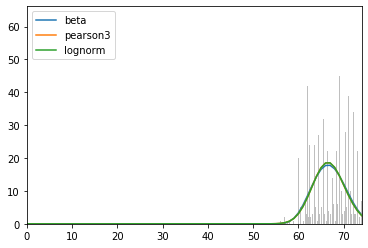


Distribution parameters:
------------------------

Distribution: beta
Parameters: (7.406090643912156, 9.015657006042987, 53.24049049464658, 29.94620166539006)

Distribution: pearson3
Parameters: (0.13562430113213073, 66.74593027975585, 3.5794082034841903)

Distribution: lognorm
Parameters: (0.04088164832169877, -20.75603156068082, 87.42888418920282)


In [28]:
# Divide the observed data into 100 bins for plotting (this can be changed)
number_of_bins = 100
bin_cutoffs = np.linspace(np.percentile(y,0), np.percentile(y,99),number_of_bins)

# Create the plot
h = plt.hist(y, bins = bin_cutoffs, color='0.75')

# Get the top three distributions from the previous phase
number_distributions_to_plot = 3
dist_names = results['Distribution'].iloc[0:number_distributions_to_plot]

# Create an empty list to stroe fitted distribution parameters
parameters = []

# Loop through the distributions ot get line fit and paraemters

for dist_name in dist_names:
    # Set up distribution and store distribution paraemters
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(y)
    parameters.append(param)
    
    # Get line for each distribution (and scale to match observed data)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
    scale_pdf = np.trapz (h[0], h[1][:-1]) / np.trapz (pdf_fitted, x)
    pdf_fitted *= scale_pdf
    
    # Add the line to the plot
    plt.plot(pdf_fitted, label=dist_name)
    
    # Set the plot x axis to contain 99% of the data
    # This can be removed, but sometimes outlier data makes the plot less clear
    plt.xlim(0,np.percentile(y,99))

# Add legend and display plot

plt.legend()
plt.show()

# Store distribution paraemters in a dataframe (this could also be saved)
dist_parameters = pd.DataFrame()
dist_parameters['Distribution'] = (
        results['Distribution'].iloc[0:number_distributions_to_plot])
dist_parameters['Distribution parameters'] = parameters

# Print parameter results
print ('\nDistribution parameters:')
print ('------------------------')

for index, row in dist_parameters.iterrows():
    print ('\nDistribution:', row[0])
    print ('Parameters:', row[1] )

### QQ & PP PLOTS - OUTCOME VARIABLE

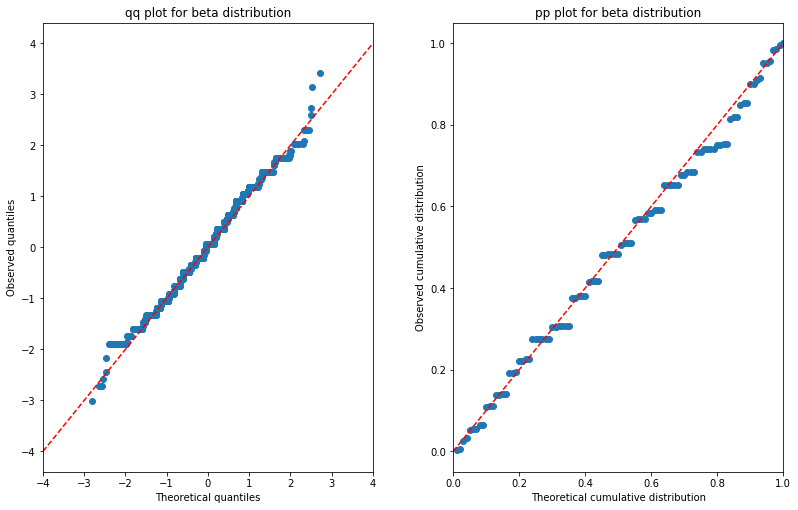

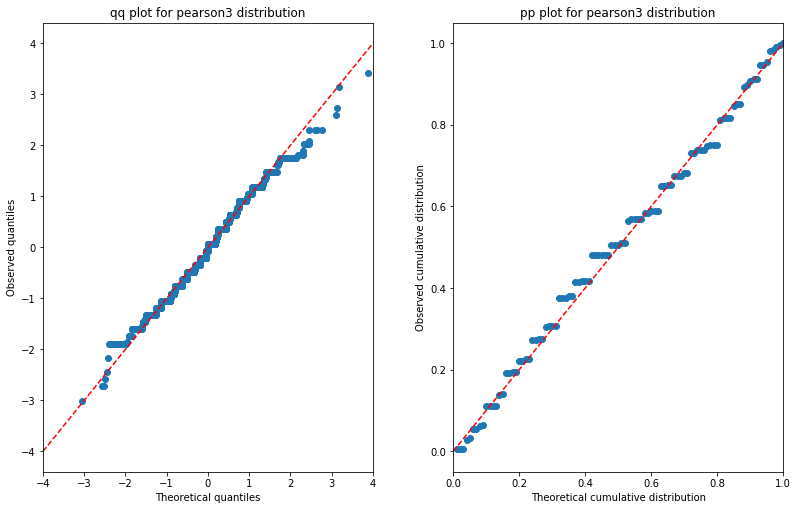

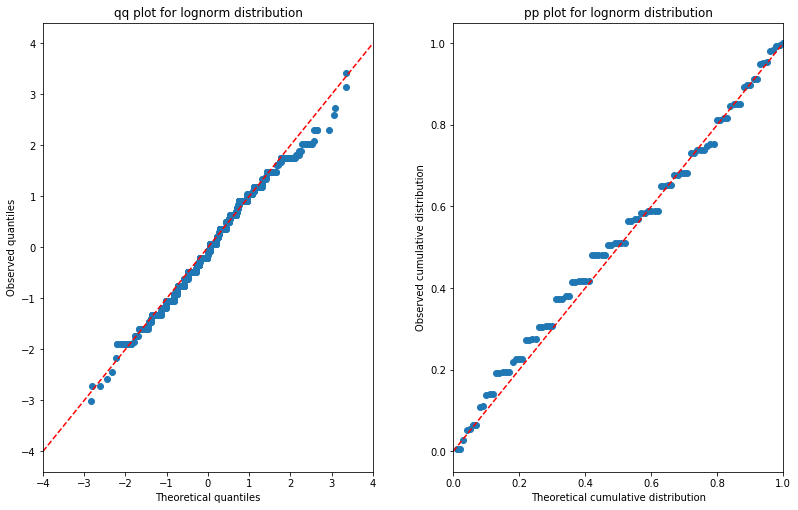

In [29]:
## qq and pp plots
    
data = y_std.copy()
data.sort()

# Loop through selected distributions (as previously selected)

for distribution in dist_names:
    # Set up distribution
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(y_std)
    
    # Get random numbers from distribution
    norm = dist.rvs(*param[0:-2],loc=param[-2], scale=param[-1],size = size)
    norm.sort()
    
    # Create figure
    fig = plt.figure(figsize=(12,8)) 
    
    # qq plot
    ax1 = fig.add_subplot(121) # Grid of 2x2, this is suplot 1
    ax1.plot(norm,data,"o")
    min_value = np.floor(min(min(norm),min(data)))
    max_value = np.ceil(max(max(norm),max(data)))
    ax1.plot([min_value,max_value],[min_value,max_value],'r--')
    ax1.set_xlim(min_value,max_value)
    ax1.set_xlabel('Theoretical quantiles')
    ax1.set_ylabel('Observed quantiles')
    title = 'qq plot for ' + distribution +' distribution'
    ax1.set_title(title)
    
    # pp plot
    ax2 = fig.add_subplot(122)
    
    # Calculate cumulative distributions
    bins = np.percentile(norm,range(0,101))
    data_counts, bins = np.histogram(data,bins)
    norm_counts, bins = np.histogram(norm,bins)
    cum_data = np.cumsum(data_counts)
    cum_norm = np.cumsum(norm_counts)
    cum_data = cum_data / max(cum_data)
    cum_norm = cum_norm / max(cum_norm)
    
    # plot
    ax2.plot(cum_norm,cum_data,"o")
    min_value = np.floor(min(min(cum_norm),min(cum_data)))
    max_value = np.ceil(max(max(cum_norm),max(cum_data)))
    ax2.plot([min_value,max_value],[min_value,max_value],'r--')
    ax2.set_xlim(min_value,max_value)
    ax2.set_xlabel('Theoretical cumulative distribution')
    ax2.set_ylabel('Observed cumulative distribution')
    title = 'pp plot for ' + distribution +' distribution'
    ax2.set_title(title)
    
    # Display plot    
    plt.tight_layout(pad=4)
    plt.show()

In [30]:
data1.head()

,father,mother,midparentHeight,childHeight
0,78.5,67.0,75.43,73.2
1,78.5,67.0,75.43,69.2
2,78.5,67.0,75.43,69.0
3,78.5,67.0,75.43,69.0
4,75.5,66.5,73.66,73.5


### 2. Discrete Random Variable Probability Distributions
#perform  a chi-square goodness of fit test unless its a binomial random variable

In [31]:
import scipy.stats as stats

observed_values=scipy.array([50,50,50,50,50])
# A shop owner claimed an equal number of customers come into his shop each week day.
# The claim is for a Poisson discrete random variable distribution
expected_values=scipy.array([50,60,40,47,53])
# These are the actual number of customers who came on each week day

#perform Chi-Square Goodness of Fit Test
stats.chisquare(f_obs=observed_values, f_exp=expected_values)

# H0: (null hypothesis) A variable follows a hypothesized distribution.
# H1: (alternative hypothesis) A variable does not follow a hypothesized distribution.

# Conclusion 
# Because the p-value is 0.3392 ( > 0.05) there is no evidence to reject the claim


C:\Users\gugla\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\gugla\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  


Power_divergenceResult(statistic=4.527967349123512, pvalue=0.33924414497841204)